In [82]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [5]:
pathToData = Path('/Volumes/sieben/splineFitter/test_data/Cep152_DL755_4_1_MMStack_Pos0_9_all_Localizations.csv')

# Load the test data
with open(str(pathToData), 'r') as f:
    df = pd.read_csv(f)

In [6]:
df.describe()

,frame,x_pix,y_pix,z_nm,photons,background,crlb_x,crlb_y,crlb_z,crlb_photons,crlb_background,logLikelyhood,x_nm,y_nm,crlb_xnm,crlb_ynm
count,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06,1.854135e+06
mean,1.645423e+03,4.026525e+02,3.886522e+02,-7.131978e+00,1.452891e+03,9.277164e+00,1.530074e-01,1.537575e-01,2.131210e+01,8.005098e+01,3.541422e-01,-2.205759e+02,4.268117e+04,4.119714e+04,1.621879e+01,1.629830e+01
std,9.986061e+02,2.086124e+02,2.248771e+02,2.793995e+02,3.084086e+03,2.630828e+00,2.530553e+00,3.182915e+00,1.044994e+02,1.956579e+02,1.288486e-01,2.489694e+02,2.211291e+04,2.383697e+04,2.682445e+02,3.373946e+02
min,1.000000e+00,8.212800e+00,4.250000e+00,-1.510000e+03,1.000000e+00,1.000000e-02,3.944200e-03,3.932700e-03,3.102400e-01,2.844700e+01,2.026000e-01,-1.091200e+05,8.705500e+02,4.505000e+02,4.180900e-01,4.168700e-01
25%,7.750000e+02,2.304400e+02,1.807700e+02,-1.100100e+02,4.762200e+02,8.512700e+00,1.056000e-01,1.048300e-01,1.130300e+01,4.737900e+01,2.878300e-01,-2.174000e+02,2.442700e+04,1.916200e+04,1.119400e+01,1.111200e+01
50%,1.604000e+03,3.912200e+02,3.962700e+02,-1.987600e+01,7.023900e+02,9.319400e+00,1.484900e-01,1.480800e-01,1.989000e+01,5.790800e+01,3.095700e-01,-1.758700e+02,4.146900e+04,4.200400e+04,1.574000e+01,1.569700e+01
75%,2.497000e+03,5.699800e+02,5.846100e+02,7.551100e+01,1.267100e+03,1.005000e+01,1.911700e-01,1.908700e-01,2.895200e+01,8.369500e+01,3.729100e-01,-1.574200e+02,6.041800e+04,6.196800e+04,2.026400e+01,2.023200e+01
max,3.459000e+03,7.726200e+02,7.722600e+02,1.480000e+03,2.985600e+05,1.302400e+02,3.318600e+03,4.202200e+03,1.181400e+05,1.408900e+04,7.830200e+00,-9.576900e+01,8.189800e+04,8.186000e+04,3.517800e+05,4.454400e+05


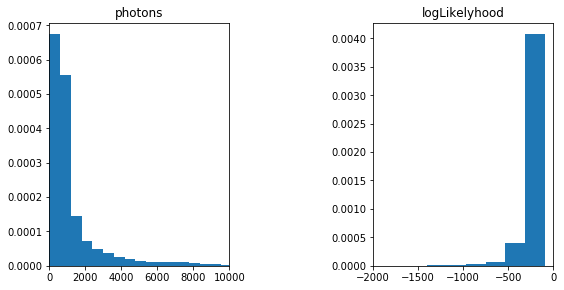

In [90]:
x1 = df.photons; x2 = df.logLikelyhood;

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x1, bins=500,normed=1);
plt.title('photons')
plt.xlim(0, 10e3)

plt.subplot(1,2,2)
plt.hist(x2, bins=500,normed=1);
plt.title('logLikelyhood')
plt.xlim(-2e3, 0)

plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8,)
plt.show()

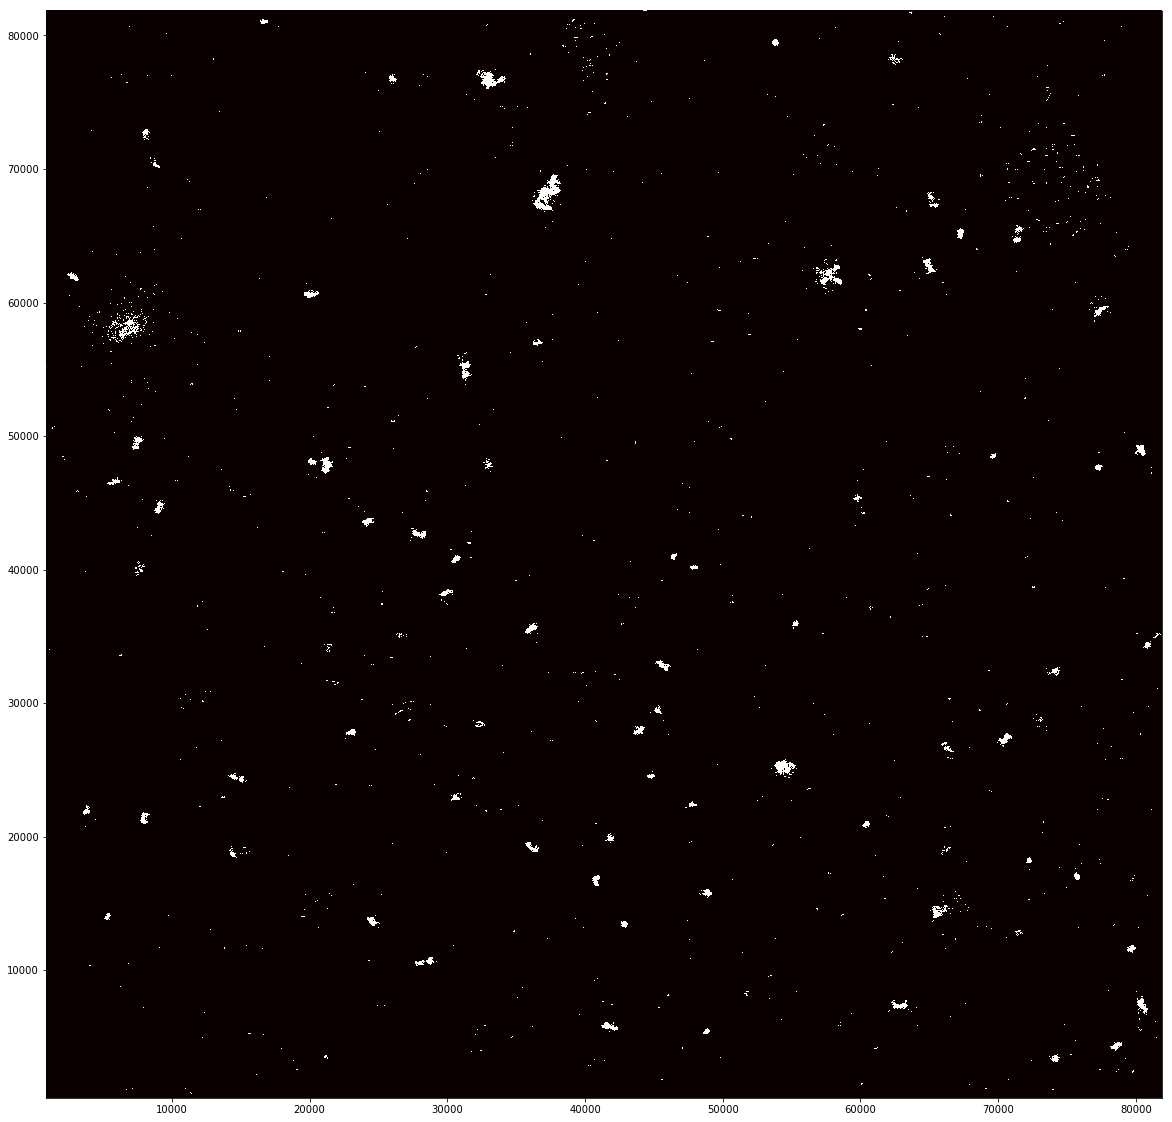

In [95]:
# Render the data

pxlsize = 10;

height = round(int(max(df.x_nm)-min(df.x_nm))/pxlsize)
width  = round(int(max(df.y_nm)-min(df.y_nm))/pxlsize)

plt.figure(figsize=(20,20))
plt.hist2d(df.x_nm, df.y_nm, bins=[width, height],clim=(0.0, 0.7),cmap="hot");
plt.show()

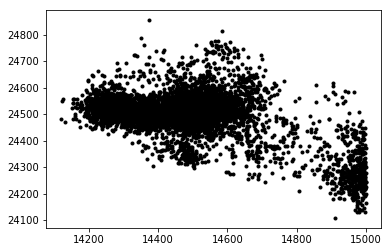

In [129]:
# Using filters

f1 = df['x_nm'].between(13e3, 15e3, inclusive=False);
f2 = df['y_nm'].between(24e3, 26e3, inclusive=False);
f3 = df.photons > 200;
f4 = df.logLikelyhood > (-200);
f5 = df.frame > 1000;

plt.scatter(df.x_nm[f1&f2&f3&f4&f5],df.y_nm[f1&f2&f3&f4&f5],marker = '.', color = 'black');
plt.show()